In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D , Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [3]:
EPOCHS = 40

In [4]:


# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



In [5]:
x_train.shape

(50000, 32, 32, 3)

In [58]:
y_train[0].shape

(10,)

In [59]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


AlexNet

In [60]:


# Define the AlexNet architecture
alexnet = Sequential()

# First convolutional layer
alexnet.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
alexnet.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
alexnet.add(Conv2D(192, (3, 3), strides=(1, 1), padding='same', activation='relu'))

# Fourth convolutional layer
alexnet.add(Conv2D(192, (3, 3), strides=(1, 1), padding='same', activation='relu'))

# Fifth convolutional layer
alexnet.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layer
alexnet.add(Flatten())

# Fully connected layers
alexnet.add(Dense(512, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(512, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(10, activation='softmax'))



In [61]:

# Compile the model
alexnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



In [62]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [63]:
alexnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 192)         221376    
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 192)        

In [65]:
# Train the model
alexnet_history = alexnet.fit(x_train, y_train, batch_size=128, epochs=EPOCHS, validation_data=(x_test, y_test))



Epoch 1/40
391/391 [==============================] - 18s 46ms/step - loss: 1.7202 - accuracy: 0.3520 - val_loss: 1.4762 - val_accuracy: 0.4851
Epoch 2/40
391/391 [==============================] - 17s 44ms/step - loss: 1.2262 - accuracy: 0.5557 - val_loss: 1.0458 - val_accuracy: 0.6244
Epoch 3/40
391/391 [==============================] - 17s 44ms/step - loss: 0.9948 - accuracy: 0.6469 - val_loss: 0.8636 - val_accuracy: 0.6954
Epoch 4/40
391/391 [==============================] - 17s 44ms/step - loss: 0.8222 - accuracy: 0.7121 - val_loss: 0.8201 - val_accuracy: 0.7178
Epoch 5/40
391/391 [==============================] - 17s 44ms/step - loss: 0.7024 - accuracy: 0.7557 - val_loss: 0.7776 - val_accuracy: 0.7318
Epoch 6/40
391/391 [==============================] - 17s 44ms/step - loss: 0.6153 - accuracy: 0.7850 - val_loss: 0.7582 - val_accuracy: 0.7404
Epoch 7/40
391/391 [==============================] - 17s 44ms/step - loss: 0.5314 - accuracy: 0.8172 - val_loss: 0.7149 - val_accuracy:

In [66]:
# Evaluate the model
_, accuracy = alexnet.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

313/313 [==============================] - 4s 11ms/step - loss: 1.2519 - accuracy: 0.7618
Test accuracy: 0.7617999911308289


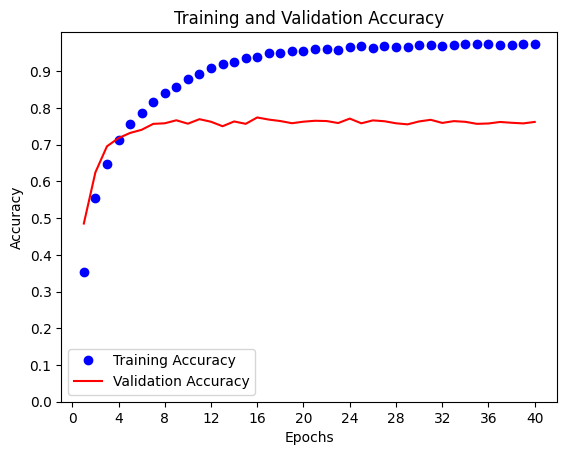

In [107]:
# Retrieve accuracy values from the history object
train_acc = alexnet_history.history['accuracy']
val_acc = alexnet_history.history['val_accuracy']

# Plot accuracy values
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy',color = 'red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,41 , 4))
plt.yticks(np.arange(0,1 , 0.1))

plt.legend()
plt.show()

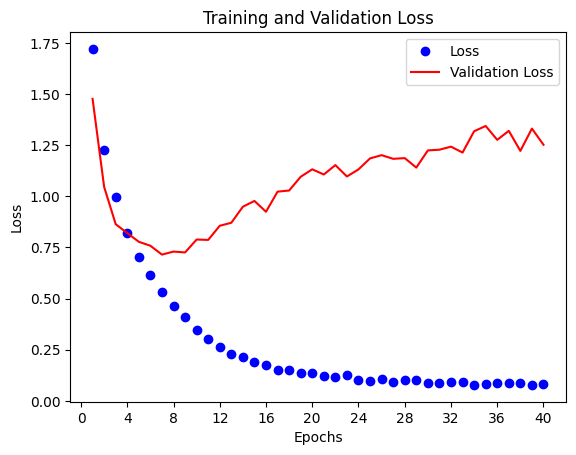

In [108]:
# Retrieve accuracy values from the history object
loss = alexnet_history.history['loss']
val_loss = alexnet_history.history['val_loss']

# Plot accuracy values
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, val_loss, label='Validation Loss', color = 'red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,41 , 4))


plt.legend()
plt.show()

In [90]:
alexnet.save(r"models/alexnet_model")

INFO:tensorflow:Assets written to: models/alexnet_model/assets


INFO:tensorflow:Assets written to: models/alexnet_model/assets


VGGNet

In [72]:



# Load the VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add your own fully connected layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # 10 classes in CIFAR-10 dataset

# Create the final model
vggnet = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False



In [73]:
# Compile the model
vggnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])




In [74]:
# Train the model
vggnet_history = vggnet.fit(x_train, y_train, batch_size=128, epochs=EPOCHS, validation_data=(x_test, y_test))



Epoch 1/40
391/391 [==============================] - 27s 68ms/step - loss: 1.4186 - accuracy: 0.5073 - val_loss: 1.2781 - val_accuracy: 0.5518
Epoch 2/40
391/391 [==============================] - 65s 167ms/step - loss: 1.2052 - accuracy: 0.5816 - val_loss: 1.2086 - val_accuracy: 0.5762
Epoch 3/40
391/391 [==============================] - 95s 244ms/step - loss: 1.1438 - accuracy: 0.6024 - val_loss: 1.1817 - val_accuracy: 0.5824
Epoch 4/40
391/391 [==============================] - 92s 235ms/step - loss: 1.1057 - accuracy: 0.6157 - val_loss: 1.1626 - val_accuracy: 0.5919
Epoch 5/40
391/391 [==============================] - 81s 206ms/step - loss: 1.0709 - accuracy: 0.6254 - val_loss: 1.1678 - val_accuracy: 0.5917
Epoch 6/40
391/391 [==============================] - 75s 192ms/step - loss: 1.0415 - accuracy: 0.6369 - val_loss: 1.1750 - val_accuracy: 0.5889
Epoch 7/40
391/391 [==============================] - 79s 203ms/step - loss: 1.0123 - accuracy: 0.6473 - val_loss: 1.1269 - val_acc

In [75]:
# Evaluate the model
_, accuracy = vggnet.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

313/313 [==============================] - 5s 16ms/step - loss: 1.3216 - accuracy: 0.6134
Test accuracy: 0.6133999824523926


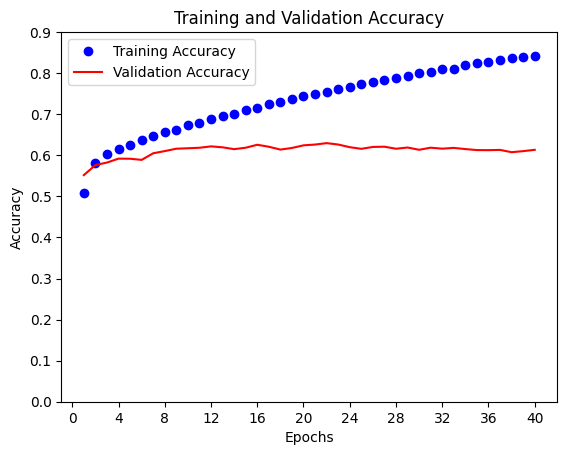

In [109]:
# Retrieve accuracy values from the history object
train_acc = vggnet_history.history['accuracy']
val_acc = vggnet_history.history['val_accuracy']



# Plot accuracy values
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy' , color = 'red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,41 , 4))
plt.yticks(np.arange(0,1 , 0.1))

plt.legend()
plt.show()

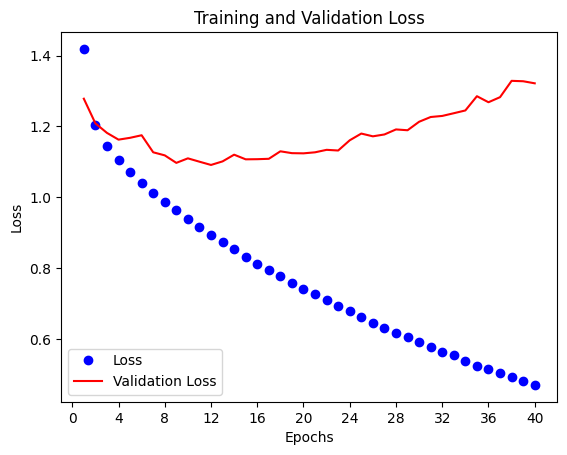

In [110]:
# Retrieve accuracy values from the history object
loss = vggnet_history.history['loss']
val_loss = vggnet_history.history['val_loss']

# Plot accuracy values
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, val_loss, label='Validation Loss' , color = 'red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,41 , 4))


plt.legend()
plt.show()

In [89]:
vggnet.save(r"models/vggnet_model")

INFO:tensorflow:Assets written to: models/vggnet_model/assets


INFO:tensorflow:Assets written to: models/vggnet_model/assets


ResNet50

In [77]:
# Load the ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add your own fully connected layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # 10 classes in CIFAR-10 dataset

# Create the final model
resnet = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False



In [78]:

# Compile the model
resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:

# Train the model
resnet_history = resnet.fit(x_train, y_train, batch_size=128, epochs=EPOCHS, validation_data=(x_test, y_test))

Epoch 1/40
391/391 [==============================] - 37s 91ms/step - loss: 2.0943 - accuracy: 0.2408 - val_loss: 1.9874 - val_accuracy: 0.2711
Epoch 2/40
391/391 [==============================] - 32s 81ms/step - loss: 1.9023 - accuracy: 0.3112 - val_loss: 1.9288 - val_accuracy: 0.2945
Epoch 3/40
391/391 [==============================] - 35s 90ms/step - loss: 1.8441 - accuracy: 0.3335 - val_loss: 1.8111 - val_accuracy: 0.3493
Epoch 4/40
391/391 [==============================] - 59s 152ms/step - loss: 1.8067 - accuracy: 0.3474 - val_loss: 1.9038 - val_accuracy: 0.3210
Epoch 5/40
391/391 [==============================] - 61s 157ms/step - loss: 1.7783 - accuracy: 0.3608 - val_loss: 1.7316 - val_accuracy: 0.3803
Epoch 6/40
391/391 [==============================] - 60s 153ms/step - loss: 1.7603 - accuracy: 0.3663 - val_loss: 1.7704 - val_accuracy: 0.3641
Epoch 7/40
391/391 [==============================] - 59s 152ms/step - loss: 1.7363 - accuracy: 0.3777 - val_loss: 1.7024 - val_accur

In [80]:

# Evaluate the model
_, accuracy = resnet.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

313/313 [==============================] - 9s 26ms/step - loss: 1.6041 - accuracy: 0.4255
Test accuracy: 0.4255000054836273


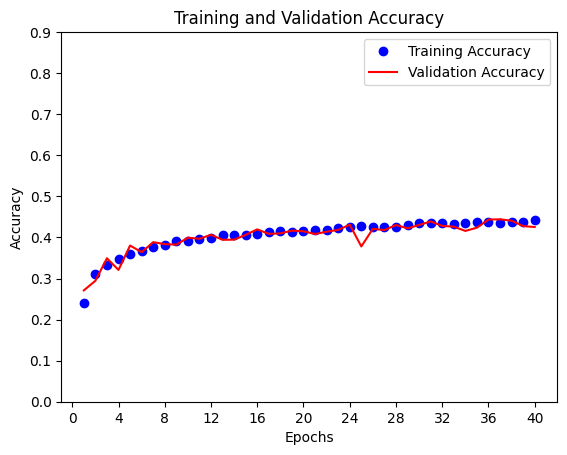

In [111]:
# Retrieve accuracy values from the history object
train_acc = resnet_history.history['accuracy']
val_acc = resnet_history.history['val_accuracy']

# Plot accuracy values
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy' , color = 'red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,41 , 4))
plt.yticks(np.arange(0,1 , 0.1))

plt.legend()
plt.show()

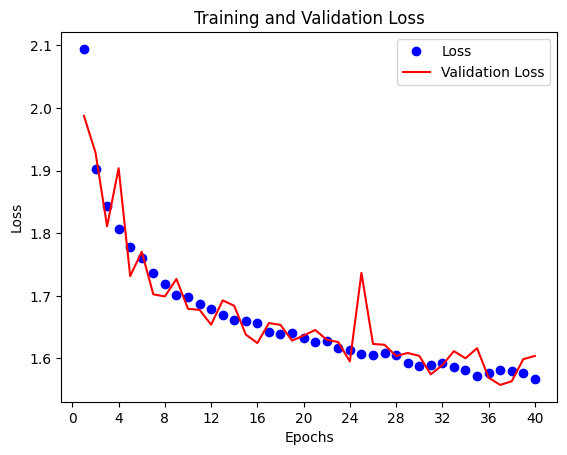

In [112]:
# Retrieve accuracy values from the history object
loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']

# Plot accuracy values
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, val_loss, label='Validation Loss' , color = 'red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,41 , 4))


plt.legend()
plt.show()

In [91]:
resnet.save(r"models/resnet_model")


INFO:tensorflow:Assets written to: models/resnet_model/assets


INFO:tensorflow:Assets written to: models/resnet_model/assets


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:



# Apply data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(x_train)

# Create the base ResNet model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Define the optimized model
model = Model(inputs=base_model.input, outputs=predictions)

# Fine-tune the model
for layer in base_model.layers[:150]:
    layer.trainable = False
for layer in base_model.layers[150:]:
    layer.trainable = True




Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [14]:
# Train the model with data augmentation
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=EPOCHS, validation_data=(x_test, y_test))



Epoch 1/40
1563/1563 [==============================] - 68s 43ms/step - loss: 1.9451 - accuracy: 0.3139 - val_loss: 2.1033 - val_accuracy: 0.2775
Epoch 2/40
1563/1563 [==============================] - 66s 42ms/step - loss: 1.7575 - accuracy: 0.3771 - val_loss: 2.3865 - val_accuracy: 0.3050
Epoch 3/40
1563/1563 [==============================] - 855s 547ms/step - loss: 1.6869 - accuracy: 0.4036 - val_loss: 1.8255 - val_accuracy: 0.3697
Epoch 4/40
1563/1563 [==============================] - 65s 42ms/step - loss: 1.6394 - accuracy: 0.4181 - val_loss: 2.4958 - val_accuracy: 0.3165
Epoch 5/40
1563/1563 [==============================] - 64s 41ms/step - loss: 1.6073 - accuracy: 0.4297 - val_loss: 2.4737 - val_accuracy: 0.2933
Epoch 6/40
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5689 - accuracy: 0.4432 - val_loss: 2.2119 - val_accuracy: 0.3364
Epoch 7/40
1563/1563 [==============================] - 80s 51ms/step - loss: 1.5424 - accuracy: 0.4530 - val_loss: 2.5883

In [15]:
_

In [16]:
resnet2_history = _

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

313/313 [==============================] - 7s 22ms/step - loss: 1.6813 - accuracy: 0.4503
Test Loss: 1.6813
Test Accuracy: 0.4503


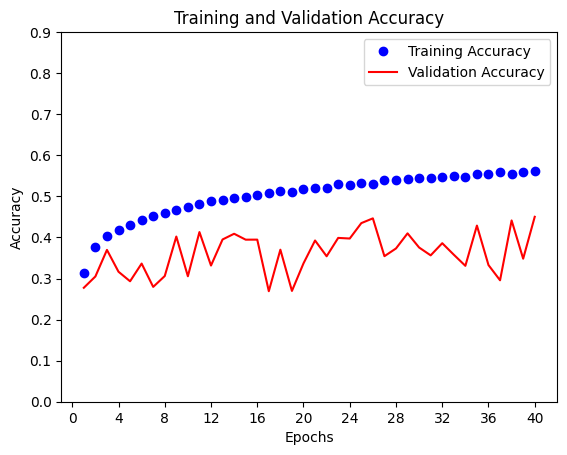

In [18]:
# Retrieve accuracy values from the history object
train_acc = resnet2_history.history['accuracy']
val_acc = resnet2_history.history['val_accuracy']

# Plot accuracy values
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy' , color = 'red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,41 , 4))
plt.yticks(np.arange(0,1 , 0.1))

plt.legend()
plt.show()

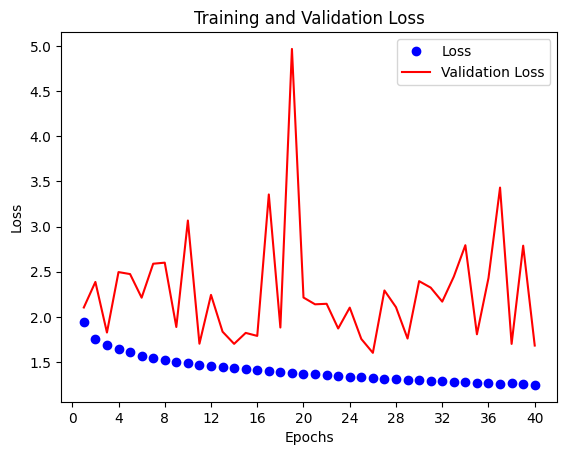

In [19]:
# Retrieve accuracy values from the history object
loss = resnet2_history.history['loss']
val_loss = resnet2_history.history['val_loss']

# Plot accuracy values
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, val_loss, label='Validation Loss' , color = 'red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,41 , 4))


plt.legend()
plt.show()